In [1]:
import numpy as np
import pandas as pd
from pandas import Series,DataFrame,Panel
import time
from datetime import datetime
import os
import matplotlib
import statsmodels.api as sm
import quandl

/Users/yuzhetang/anaconda/lib/python3.5/site-packages/statsmodels/compat/pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


In [2]:
factor_return = pd.read_csv('./Downloads/F-F_Research_Data_5_Factors_2x3.CSV',index_col=0)
factor_return.index = pd.to_datetime(factor_return.index,format='%Y%m').to_period('M')
factor_return = factor_return['1980-01':'2017-12']

In [3]:
factor_return.tail(5)

,Mkt-RF,SMB,HML,RMW,CMA,RF
2017-08,0.16,-1.87,-2.26,0.44,-2.44,0.09
2017-09,2.51,4.80,3.02,-1.50,1.64,0.09
2017-10,2.25,-1.94,-0.08,1.18,-3.32,0.09
2017-11,3.12,-0.39,0.02,3.05,0.04,0.08
2017-12,1.06,-1.04,0.10,0.78,1.62,0.09


In [4]:
inflation = quandl.get("RATEINF/INFLATION_USA")
inflation.index = (inflation.index + pd.DateOffset(months=1)).to_period('M')
inflation = inflation['1980-01':'2017-12']

PMI = quandl.get("ISM/MAN_PMI")
PMI.index = PMI.index.to_period('M')
PMI = PMI['1980-01':'2017-12']

Average_Weekly_Hours = quandl.get("FRED/AWHNONAG")
Average_Weekly_Hours.index = Average_Weekly_Hours.index.to_period('M')
Average_Weekly_Hours = Average_Weekly_Hours['1980-01':'2017-12']

M2 = quandl.get("FRED/M2SL")
M2_diff = M2.pct_change().dropna()
M2_diff.index = M2_diff.index.to_period('M')
M2_diff = M2_diff['1980-01':'2017-12']

ten_yr_spread = quandl.get("FRED/T10YFFM")
ten_yr_spread.index = ten_yr_spread.index.to_period('M')
ten_yr_spread = ten_yr_spread['1980-01':'2017-12']

Building_Permit = quandl.get("FRED/PERMIT", end_date="2017-11-30")
Building_Permit.index = Building_Permit.index.to_period('M')
Building_Permit = Building_Permit['1980-01':'2017-12']

Nonfarm_Payroll = quandl.get("FRED/PAYEMS", authtoken="NvCE6q3qTHbJz2XBoasT")
Nonfarm_Payroll.index = Nonfarm_Payroll.index.to_period('M')
Nonfarm_Payroll = Nonfarm_Payroll['1980-01':'2017-12']

Initial_Claims = quandl.get("FRED/ICSA", authtoken="NvCE6q3qTHbJz2XBoasT", collapse="monthly")
Initial_Claims.index = (Initial_Claims.index + pd.DateOffset(months=1)).to_period('M')
Initial_Claims = Initial_Claims['1980-01':'2017-12']


In [23]:
Average_Weekly_Hours

,Index
Date,
1980-01,46.2
1980-02,50.2
1980-03,43.6
1980-04,37.4
1980-05,29.4
1980-06,30.3
1980-07,35.0
1980-08,45.5
1980-09,50.1


In [7]:
for i in factor_return.columns[:-1]:
    print(i)
    print(np.corrcoef(inflation.values.T[0],factor_return[i].values)[0][1])

Mkt-RF
-0.0761661748657
SMB
0.0225095878378
HML
0.0108426154951
RMW
0.0497598816757
CMA
7.44227570383e-05


In [8]:
for i in factor_return.columns[:-1]:
    print(i)
    print(np.corrcoef(PMI.values.T[0],factor_return[i].values)[0][1])

Mkt-RF
0.0224461599256
SMB
-0.0543344819101
HML
0.0487636057402
RMW
-0.0332359126851
CMA
-0.00901113343852


In [9]:
for i in factor_return.columns[:-1]:
    print(i)
    print(np.corrcoef(PMI.values.T[0],factor_return[i].values)[0][1])

Mkt-RF
0.0224461599256
SMB
-0.0543344819101
HML
0.0487636057402
RMW
-0.0332359126851
CMA
-0.00901113343852


In [10]:
for i in factor_return.columns[:-1]:
    print(i)
    print(np.corrcoef(PMI.values.T[0],factor_return[i].values)[0][1])

Mkt-RF
0.0224461599256
SMB
-0.0543344819101
HML
0.0487636057402
RMW
-0.0332359126851
CMA
-0.00901113343852


In [11]:
for i in factor_return.columns[:-1]:
    print(i)
    print(np.corrcoef(Average_Weekly_Hours.values.T[0],factor_return[i].values)[0][1])

Mkt-RF
0.0224461599256
SMB
-0.0543344819101
HML
0.0487636057402
RMW
-0.0332359126851
CMA
-0.00901113343852


In [12]:
for i in factor_return.columns[:-1]:
    print(i)
    print(np.corrcoef(M2_diff.values.T[0],factor_return[i].values)[0][1])

Mkt-RF
-0.0496870306496
SMB
-0.00303648394196
HML
-0.0510580379321
RMW
0.0318281953538
CMA
-0.00592843909911


In [13]:
for i in factor_return.columns[:-1]:
    print(i)
    print(np.corrcoef(Nonfarm_Payroll.values.T[0],factor_return[i].values)[0][1])

Mkt-RF
-0.0139084502371
SMB
0.0150698842688
HML
-0.0522669877221
RMW
-0.00369251961344
CMA
-0.0531423064873


In [14]:
for i in factor_return.columns[:-1]:
    print(i)
    print(np.corrcoef(Initial_Claims.values.T[0],factor_return[i].values)[0][1])

Mkt-RF
0.0431071021536
SMB
0.134885244235
HML
-0.0255865748627
RMW
0.0220563003908
CMA
0.0136072138424


In [15]:
from sklearn.linear_model import LinearRegression

In [16]:
reg = LinearRegression(n_jobs = -1)

In [17]:
X = pd.concat([inflation, PMI, Average_Weekly_Hours, M2_diff, ten_yr_spread, Building_Permit, Nonfarm_Payroll, Initial_Claims], axis = 1)
X.columns = ['Inflation', 'PMI', 'Average_Weekly_Hours', 'M2_diff', 'Ten_yr_Spread', 'Building_Permit', 'Nonfarm_Payroll', 'Initial_Claims']

In [18]:
X.to_csv('econ_var.csv')

In [19]:
y = factor_return.iloc[:,:-1]

In [20]:
reg.fit(X=X, y = y)

ValueError: Input contains NaN, infinity or a value too large for dtype('float64').

In [21]:
reg.score(X,y)

NotFittedError: This LinearRegression instance is not fitted yet. Call 'fit' with appropriate arguments before using this method.

In [146]:
for item in y.columns:
    print('item = ',item)
    reg = LinearRegression()
    print('Same month rsq = ', reg.fit(X, y[item]).score(X, y[item]))
    reg = LinearRegression()
    print('1m leading month rsq = ', reg.fit(X.shift(1).fillna(0), y[item]).score(X.shift(1).fillna(0), y[item]))
    reg = LinearRegression()
    print('1m lag month rsq = ', reg.fit(X.shift(-1).fillna(0), y[item]).score(X.shift(-1).fillna(0), y[item]))

item =  Mkt-RF
Same month rsq =  0.0178872405725
1m leading month rsq =  0.0303297118232
1m lag month rsq =  0.0242020439482
item =  SMB
Same month rsq =  0.0411287340885
1m leading month rsq =  0.0328667991195
1m lag month rsq =  0.0333010257308
item =  HML
Same month rsq =  0.012210139062
1m leading month rsq =  0.0398522199917
1m lag month rsq =  0.0084368177658
item =  RMW
Same month rsq =  0.011380542746
1m leading month rsq =  0.0207789820018
1m lag month rsq =  0.011517157755
item =  CMA
Same month rsq =  0.006734072279
1m leading month rsq =  0.0158526773392
1m lag month rsq =  0.00973919518308


In [6]:
X = pd.concat([inflation, PMI, Average_Weekly_Hours, M2_diff, ten_yr_spread, Building_Permit, Nonfarm_Payroll, Initial_Claims], axis = 1)

In [22]:
X_new = pd.concat([X,X.shift(1).fillna(method = 'bfill'),X.shift(2).fillna(method = 'bfill'),X.shift(3).fillna(method = 'bfill'),X.shift(4).fillna(method = 'bfill'),X.shift(5).fillna(method = 'bfill'),X.shift(6).fillna(method = 'bfill')], axis = 1)
X_new = X_new.fillna(method = 'ffill').fillna(method = 'bfill')

In [23]:
for item in y.columns:
    print('item = ',item)
    reg = LinearRegression()
    print('Same month rsq = ', reg.fit(X_new, y[item]).score(X_new, y[item]))
    reg = LinearRegression()
    print('1m leading month rsq = ', reg.fit(X_new.shift(1).fillna(0), y[item]).score(X_new.shift(1).fillna(0), y[item]))
    reg = LinearRegression()
    print('1m lag month rsq = ', reg.fit(X_new.shift(-1).fillna(0), y[item]).score(X_new.shift(-1).fillna(0), y[item]))

item =  Mkt-RF
Same month rsq =  0.128580487833
1m leading month rsq =  0.130594322884
1m lag month rsq =  0.200370203352
item =  SMB
Same month rsq =  0.108637228457
1m leading month rsq =  0.0862794653069
1m lag month rsq =  0.151406872606
item =  HML
Same month rsq =  0.120834522307
1m leading month rsq =  0.136898042136
1m lag month rsq =  0.129164562313
item =  RMW
Same month rsq =  0.0801012462302
1m leading month rsq =  0.0801539645742
1m lag month rsq =  0.10936614826
item =  CMA
Same month rsq =  0.0819696083328
1m leading month rsq =  0.0805954993225
1m lag month rsq =  0.102631188496


In [28]:
for item in y.columns:
    print('item = ',item)
    reg = LinearRegression()
    print('Same month rsq = ', reg.fit(X_new.iloc[:400], y[item].iloc[:400]).score(X_new.iloc[400:], y[item].iloc[400:]))
    reg = LinearRegression()
    print('1m leading month rsq = ', reg.fit(X_new.shift(1).fillna(0).iloc[:400], y[item].iloc[:400]).score(X_new.shift(1).fillna(0).iloc[400:], y[item].iloc[400:]))
    reg = LinearRegression()
    print('1m lag month rsq = ', reg.fit(X_new.shift(-1).fillna(0).iloc[:400], y[item].iloc[:400]).score(X_new.shift(-1).fillna(0).iloc[400:], y[item].iloc[400:]))

item =  Mkt-RF
Same month rsq =  -0.472758143941
1m leading month rsq =  -0.635862972356
1m lag month rsq =  -0.401095323442
item =  SMB
Same month rsq =  -0.0361623672509
1m leading month rsq =  -0.113058436258
1m lag month rsq =  -0.120510778653
item =  HML
Same month rsq =  -0.153032185591
1m leading month rsq =  -0.0864894918221
1m lag month rsq =  -0.200755310307
item =  RMW
Same month rsq =  -0.123155895601
1m leading month rsq =  -0.16900473957
1m lag month rsq =  -0.148856525404
item =  CMA
Same month rsq =  -0.499470804223
1m leading month rsq =  -0.384319237912
1m lag month rsq =  -0.651871050074


In [27]:
y.iloc[:,:400]

,Mkt-RF,SMB,HML,RMW,CMA
1980-01,5.51,1.88,1.80,-1.84,2.00
1980-02,-1.22,-1.62,0.62,-1.05,3.03
1980-03,-12.90,-6.94,-1.06,1.75,-1.34
1980-04,3.97,0.99,1.06,-2.01,0.54
1980-05,5.26,2.12,0.39,0.41,-0.48
1980-06,3.06,1.48,-0.89,-0.09,-0.94
1980-07,6.49,3.95,-6.30,3.94,-2.46
1980-08,1.80,4.26,-2.64,2.06,-0.80
1980-09,2.19,0.58,-4.79,1.87,-2.82
1980-10,1.06,2.35,-2.74,1.41,-1.21


In [35]:
reg = LinearRegression()
reg.fit(y.iloc[:,1:], y.iloc[:,0]).score(y.iloc[:,1:], y.iloc[:,0])

0.23193204263194167

In [38]:
reg.fit(y.iloc[:,1:], y.iloc[:,0].shift(-1).fillna(0)).score(y.iloc[:,1:], y.iloc[:,0].shift(-1).fillna(0))

0.016172039246669434

In [57]:
from sklearn.decomposition import TruncatedSVD,PCA
from sklearn.preprocessing import scale

In [58]:
cls = PCA()

In [59]:
cls.fit(scale(X.fillna(method = 'ffill'),axis=0))

PCA(copy=True, iterated_power='auto', n_components=None, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)

In [61]:
cls.explained_variance_ratio_ * 100

array([  3.96047263e+01,   1.94712914e+01,   1.46062127e+01,
         1.15257177e+01,   8.71411831e+00,   3.15068069e+00,
         2.92725299e+00,   8.06285212e-32])

array([[ 3.89666153, -0.94900213, -0.94900213, ..., -0.16176977,
        -1.73146358,  0.66045943],
       [ 4.13670898, -0.25898384, -0.25898384, ..., -0.36310847,
        -1.72678306,  0.46586621],
       [ 4.24326663, -1.39751402, -1.39751402, ..., -0.88758333,
        -1.72023033,  0.66045943],
       ..., 
       [-0.42067964,  1.17280412,  1.17280412, ..., -0.07228591,
         1.57017601, -1.40709357],
       [-0.49562129,  1.12105274,  1.12105274, ..., -0.10459953,
         1.58281341, -1.75979379],
       [-0.43238927,  1.31080777,  1.31080777, ..., -0.10459953,
         1.59217446, -1.6503351 ]])

In [69]:
PMI=quandl.get("ISM/MAN_PMI").diff(12)
PMI.index=PMI.index.to_period('M')
PMI=PMI['1980-01':'2017-12']

In [70]:
PMI

,Index
Date,
1980-01,-12.3
1980-02,-8.0
1980-03,-14.1
1980-04,-18.8
1980-05,-25.0
1980-06,-22.4
1980-07,-16.3
1980-08,-4.0
1980-09,0.5


In [71]:
inflation

,Value
Date,
1980-01,13.294
1980-02,13.909
1980-03,14.182
1980-04,14.756
1980-05,14.731
1980-06,14.406
1980-07,14.385
1980-08,13.133
1980-09,12.873


In [72]:
from sklearn.preprocessing import scale

In [73]:
inflation_scaled = scale(inflation)
PMI_scaled = scale(PMI)

In [77]:
import matplotlib.pyplot as plt

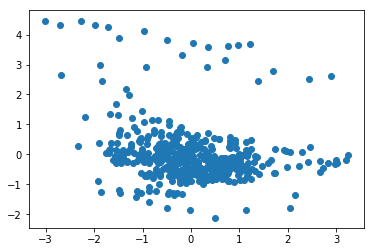

In [78]:
plt.close()
plt.scatter(PMI_scaled,inflation_scaled)
plt.show()

In [79]:
from sklearn.manifold import TSNE

In [87]:
tsne = TSNE()

In [88]:
result = tsne.fit_transform(scale(X.fillna(method = 'ffill'),axis=0))

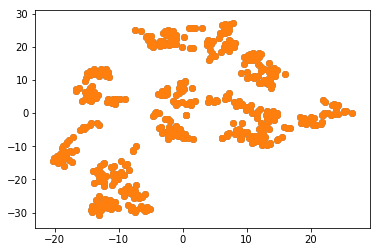

In [93]:
plt.scatter(result[:,0],result[:,1])
plt.show()

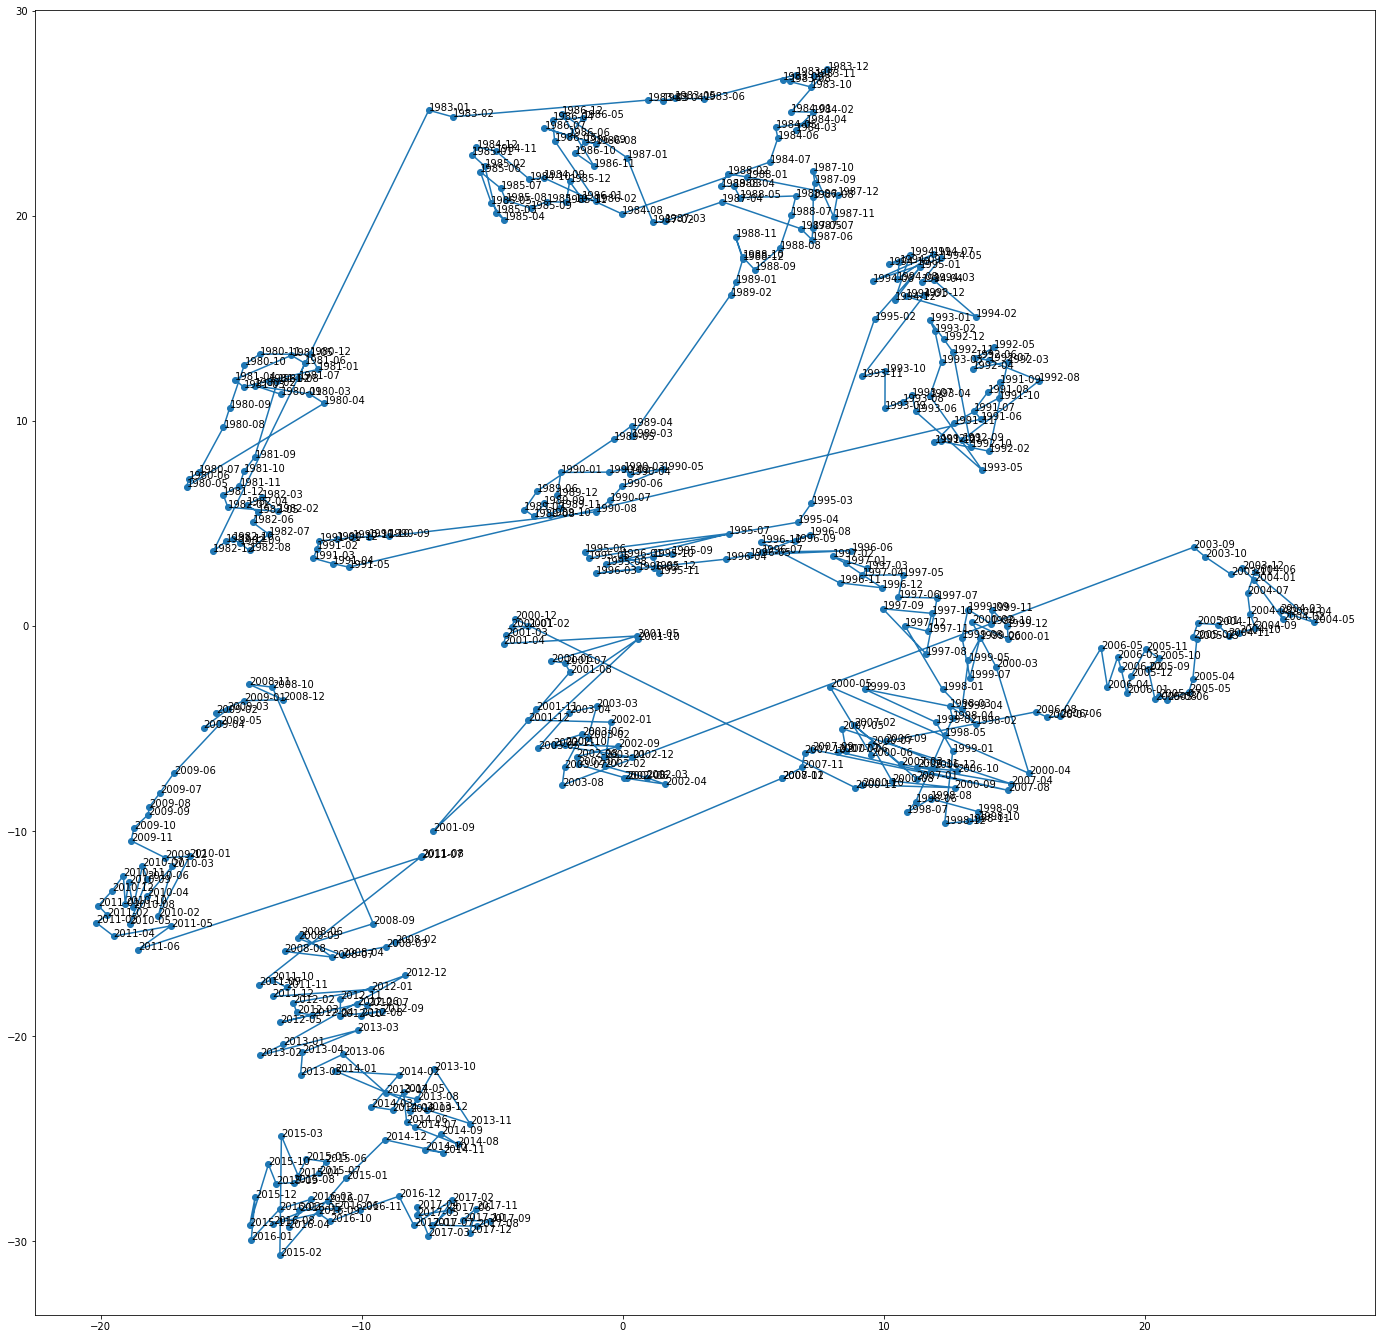

In [101]:
plt.close()
plt.figure(figsize = (24,24))
plt.plot(result[:,0],result[:,1],'-o')

for i, txt in enumerate(X.index):
    plt.annotate(txt, (result[i,0],result[i,1]))

plt.show()

In [86]:
result[0]

array([ 21.40225601,   3.64129591], dtype=float32)